In [2]:
import os
import copy
import numpy as np
import pandas as pd
from PIL import Image

class ImageConcat:
    def __init__(self, n_h, n_v, resolution=1000):
        self.n_h = n_h
        self.n_v = n_v
        self.r = resolution
        self.img = Image.new("L", (self.n_h*self.r, self.n_v*self.r), color=255)# color=(255,255,255))
        self.cursor = [0,0]
        self.max_h = 0
    
    def move_cursor_h(self, r):
        self.cursor[0] += r
        if self.cursor[0] > self.max_h:
            self.max_h = copy.deepcopy(self.cursor[0])
        
    def move_cursor_v(self):
        self.cursor[1] += self.r
        
    def reset_cursor_h(self):
        self.cursor[0] = 0
        
    def append_img(self, path, cut_margin=True, clip_white=False):
        try:
            img = Image.open(path).convert('L').resize((self.r,self.r), Image.BILINEAR)
            if cut_margin:
                img = self.cut_margin(img, clip_white=clip_white)
            self.img.paste(img, tuple(self.cursor))
            return img.size
        except:
            # print(f"Not Appended: {path}")
            return None
        
    def add_letter(self, path, cut_margin=True, clip_white=False):
        imgsize = self.append_img(path, cut_margin=cut_margin, clip_white=clip_white)
        if imgsize is None:
            self.move_cursor_h(self.r)
        else:
            self.move_cursor_h(imgsize[0])
    
    def add_space(self):
        self.move_cursor_h(int(self.r/3))
        
    def enter(self):
        self.move_cursor_v()
        self.reset_cursor_h()
        
    def cut_margin(self, img, clip_white):
        npimg = 255 - np.array(img)
        if clip_white:
            npimg[np.where(npimg<10)] = 0 
        wmin = npimg.sum(0).nonzero()[0].min()
        wmax = npimg.sum(0).nonzero()[0].max()
        # hmin = npimg.sum(1).nonzero()[0].min()
        # hmax = npimg.sum(1).nonzero()[0].max()

        npimg = 255 - npimg[:,wmin:wmax+1]
        img = Image.fromarray(npimg)
        return img

## 최종비교 CGGAN / Resized CGGAN / FD / Resized FD 


In [13]:
# "/home/jupyter/ai_font/data/reports/exp0604/cggan/i740000"
# "/home/jupyter/ai_font/data/reports/fontdiffuser/resized"
# "/home/jupyter/ai_font/data/reports/fontdiffuser/phase2/i30000"

fdafd = "/home/jupyter/ai_font/data/reports/fontdiffuser/phase2/i0"
target_letters = sorted([f.replace(".png", "").split("__")[-1] for f in os.listdir(fdafd) if f.endswith(".png")])
listofexp = [
    "/home/jupyter/ai_font/data/test/processed/플레이브밤비/플레이브밤비__closing__",

    "/home/jupyter/ai_font/data/reports/exp0604/cggan/i740000/cggan__i740000__플레이브밤비__",
    "/home/jupyter/ai_font/data/reports/fontdiffuser/resized/cggan__i740000__플레이브밤비__",
    
    "/home/jupyter/ai_font/data/reports/fontdiffuser/phase2/i30000/fontdiffuser_phase2__플레이브밤비__",
    "/home/jupyter/ai_font/data/reports/fontdiffuser/resized/fontdiffuser_phase2__플레이브밤비__",
    
]

bimg = ImageConcat(10, len(target_letters), 96)
for k in target_letters:
    for i, subf in enumerate(listofexp):
        bimg.add_letter(f"{subf}{k}.png", cut_margin=False)
        if i in [0,2]:
            bimg.add_space()
    bimg.enter()

In [15]:
bimg.img.save("resized.png")

In [4]:
bimg.img.save("cggan_report.png")

In [5]:
# FontDiffuser

fdafd = "/home/jupyter/ai_font/data/reports/fontdiffuser/phase2/i0"
target_letters = sorted([f.replace(".png", "").split("__")[-1] for f in os.listdir(fdafd) if f.endswith(".png")])
listofexp = [
    "/home/jupyter/ai_font/data/test/processed/플레이브밤비/플레이브밤비__closing__",
    
    "/home/jupyter/ai_font/data/test_assembled/플레이브밤비/플레이브밤비__closing__",

    "/home/jupyter/ai_font/data/reports/fontdiffuser/phase2/i0/fontdiffuser_phase2__플레이브밤비__",
    "/home/jupyter/ai_font/data/reports/fontdiffuser/phase2/i5000/fontdiffuser_phase2__플레이브밤비__",
    "/home/jupyter/ai_font/data/reports/fontdiffuser/phase2/i10000/fontdiffuser_phase2__플레이브밤비__",
    "/home/jupyter/ai_font/data/reports/fontdiffuser/phase2/i15000/fontdiffuser_phase2__플레이브밤비__",
    "/home/jupyter/ai_font/data/reports/fontdiffuser/phase2/i20000/fontdiffuser_phase2__플레이브밤비__",
    "/home/jupyter/ai_font/data/reports/fontdiffuser/phase2/i25000/fontdiffuser_phase2__플레이브밤비__",
    "/home/jupyter/ai_font/data/reports/fontdiffuser/phase2/i30000/fontdiffuser_phase2__플레이브밤비__",
]

bimg = ImageConcat(10, len(target_letters), 96)
for k in target_letters:
    for i, subf in enumerate(listofexp):
        bimg.add_letter(f"{subf}{k}.png", cut_margin=False)
        if i in [0,1]:
            bimg.add_space()
    bimg.enter()

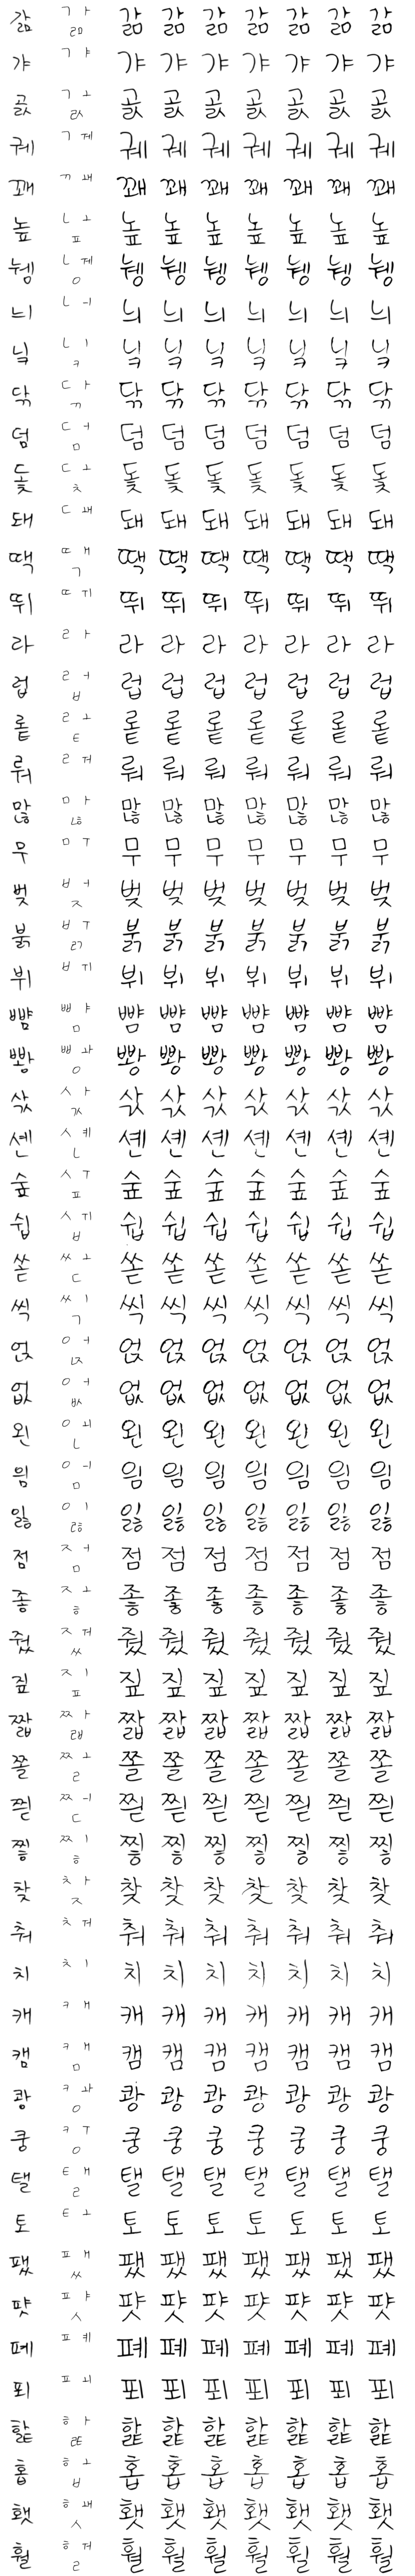

In [8]:

bimg.img